# HEART DISEASE PREDICTION

<!-- Step:1. Import Libraries -->

## Step:1.IMPORTING THE LIBRARIES ##

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Here we will be experimenting with 3 algorithms

##### 1. Logistic Regression
##### 2. RandomForestClassifier
##### 3. K-Nearest Neighbour

# Step:2.Load Dataset and Processing

In [9]:
# loading the csv data to a pandas DataFrame
dataset = pd.read_csv("Downloads/heart.csv")

In [10]:
# Data Type
type(dataset)

pandas.core.frame.DataFrame

In [11]:
# Dataset shape
dataset.shape

(303, 14)

In [12]:
# dataset.head(5) is used to see/print starting 5 rows from the data set

dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
# dataset.tail() is used to print the last 5 rows of the dataset

dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [14]:
# dataset.sample(5) is used to take 5 random rows from the dataset

dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
173,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0
273,58,1,0,100,234,0,1,156,0,0.1,2,1,3,0


In [15]:
# it is used for statistical analysis/measures about the data

dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [16]:
# we are using the for loop to print the coloumns which are present in the dataset which we have saved it in the variable named info

info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [17]:
# getting information about coloumns

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [18]:
# checking for missing values

dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Luckily, we have no missing values

In [20]:
# we are checking the satistical values of the target coloum

dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [21]:
#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

dataset["target"].unique()

array([1, 0], dtype=int64)

In [22]:
# checking the distribution of the Target Variable

dataset['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

##### 1 --> Defective Heart 
##### 0 --> Healthy Heart

# STEP:3.EDA(EXPLOTARY DATA ANALYSIS)

### First, analysing the target variable:

target
1    165
0    138
Name: count, dtype: int64


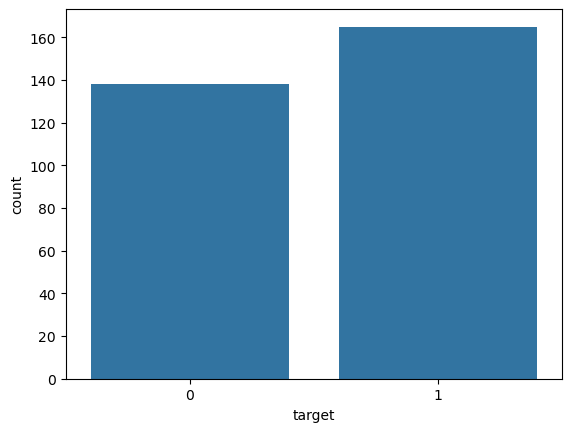

In [26]:
#storing dataset into y variable 
y = dataset

# using countplot from seaborn to plot the graph
sns.countplot(x= 'target',data =y)

# Storing in the variable
target_temp = dataset.target.value_counts()

# printing target_temp
print(target_temp)

In [27]:
# printing the percentage of patients with and without heart problem

print("Percentage of patients without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patients with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patients without heart problems: 45.54
Percentage of patients with heart problems: 54.46


### Similarly We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

## Analysing the 'Sex' feature

In [30]:
# Datatype of sex
dataset['sex'].unique()

array([1, 0], dtype=int64)

In [31]:
# checking how many females and males are present in the dataset
dataset['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [32]:
# Storing the dataset in df variable 
df = dataset

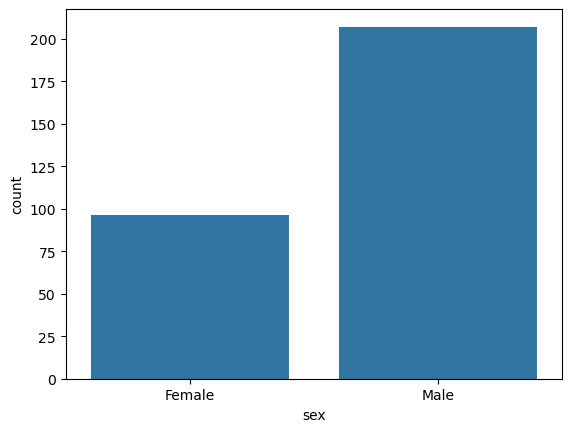

In [33]:
# using the countplot from the seaborn to plot hte graph
sns.countplot(x='sex', data=df)

# plt.xticks is used to customize the labels on x-axis
# making the 0 and 1 as Male and 

plt.xticks([0,1],['Female','Male'])
plt.show()

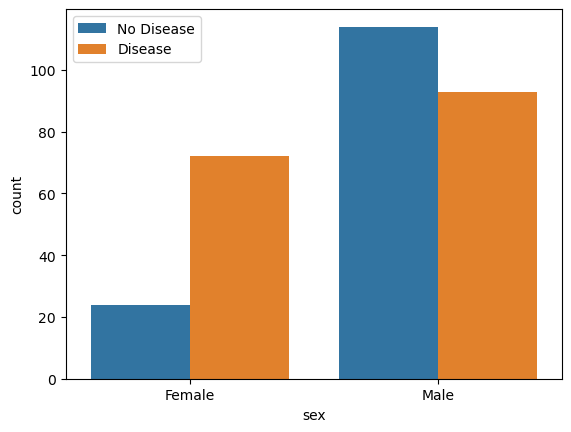

In [34]:
#using countplot to plot the graph 
sns.countplot(x ="sex",hue = "target",data = dataset) 

# making the 0 and 1 as Male and Female
plt.xticks([0,1],['Female','Male'])

# making the label as Disease and No-Disease
plt.legend(labels = ["No Disease","Disease"])
plt.show()

##### We notice, that males are more likely to have heart problems than females

## Analysing the 'Chest Pain Type' feature

#### Chest Pain type(4 Values)
#### .Value 0: Typical angina
#### .Value 1: Atypical angina
#### .Value 2: non-anginal Pain
#### .Value 3: Asymptomatic

In [38]:
#Data type of 'CP' 
dataset["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

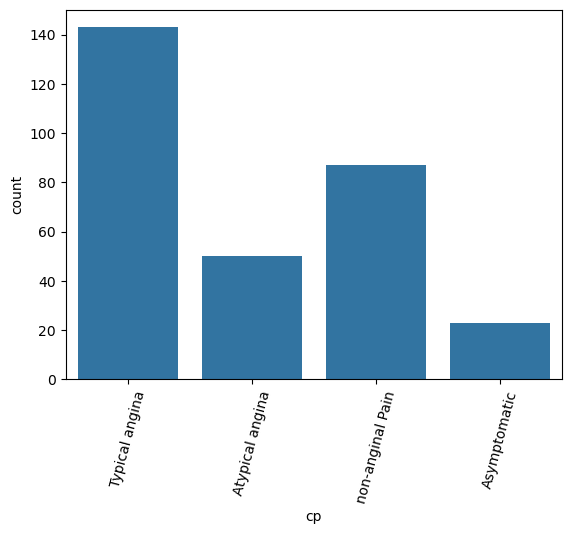

In [39]:
# Using Countplot to plot the graph
sns.countplot(x="cp",data = df)

# changing the x axis from[0,1,2,3 to values:0,1,2,3]
plt.xticks([0,1,2,3],["Typical angina","Atypical angina","non-anginal Pain","Asymptomatic"])

# rotating the x axis labels 
plt.xticks(rotation = 75)
plt.show()

#### We notice, that chest pain of '0', i.e. the ones with typical angina are much likely to have heart problems

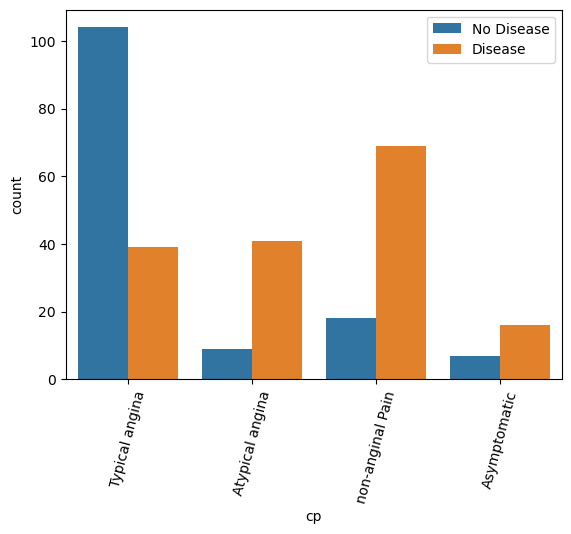

In [41]:
# Using Countplot to plot the graph
sns.countplot(x ="cp",hue = "target",data = dataset) 

# changing the x axis from[0,1,2,3 to values:0,1,2,3]
plt.xticks([0,1,2,3],["Typical angina","Atypical angina","non-anginal Pain","Asymptomatic"])

# rotating the x axis labels 
plt.xticks(rotation = 75)

# making the label as Disease and No-Disease
plt.legend(labels = ["No Disease","Disease"])
plt.show()

### Analysing the FBS(FBS-Fasting Blood Sugar)feature¶

In [43]:
# Describing the 'FBS' feature
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [44]:
# Datatype of 'FBS' feature
dataset["fbs"].unique()

array([1, 0], dtype=int64)

In [45]:
# Storing the dataset in df variable
df= dataset

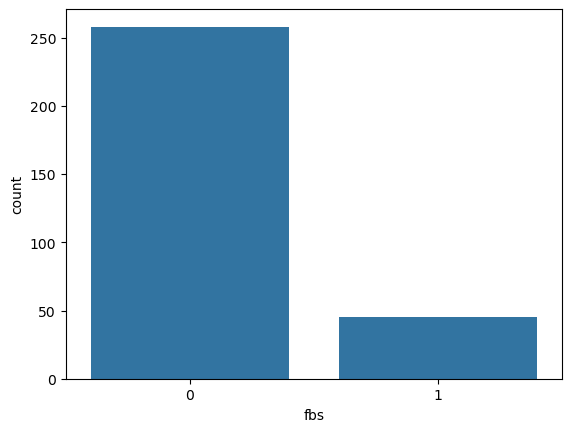

In [46]:
# using the Countplot to plot the graph
sns.countplot(x='fbs',data= df)
plt.show()

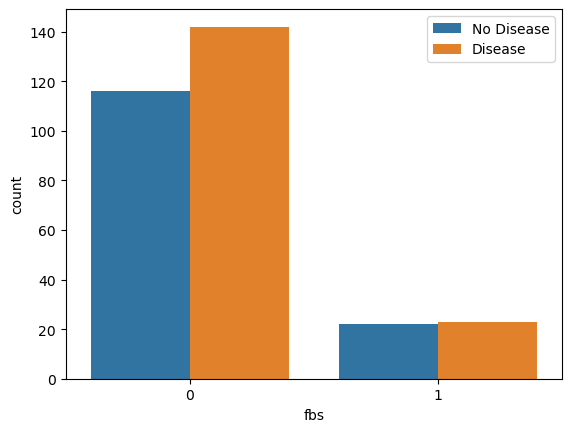

In [47]:
# Using Countplot to plot the graph
sns.countplot(x ="fbs",hue = "target",data = dataset) 

# making the label as Disease and No-Disease
plt.legend(labels = ["No Disease","Disease"])
plt.show()

### Analysing the restecg feature


In [49]:
# Datatype of 'restecg'
dataset["restecg"].unique()

array([0, 1, 2], dtype=int64)

<Axes: xlabel='restecg', ylabel='count'>

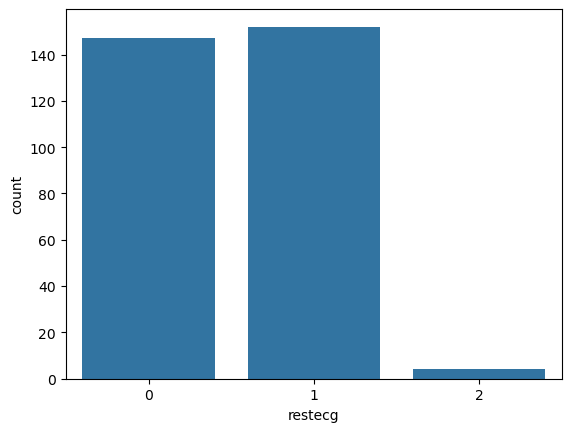

In [50]:
# Using the Countplot we are plotig the graph
sns.countplot(x='restecg' ,data=dataset)

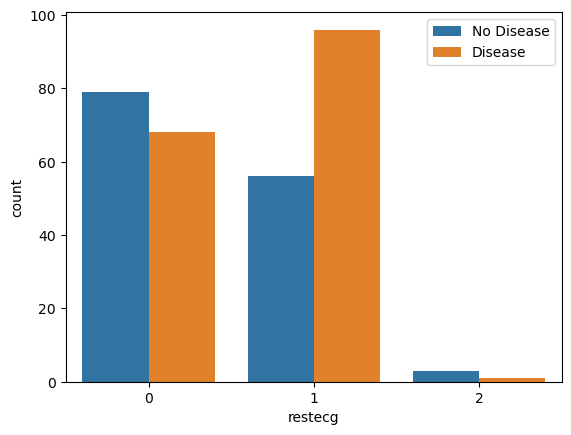

In [51]:
# Using Countplot to plot the graph
sns.countplot(x ="restecg",hue = "target",data = dataset) 

# making the label as Disease and No-Disease
plt.legend(labels = ["No Disease","Disease"])
plt.show()

#### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' feature

In [54]:
# Datatype of "exang" feature
dataset["exang"].unique()

array([0, 1], dtype=int64)

<Axes: xlabel='exang', ylabel='count'>

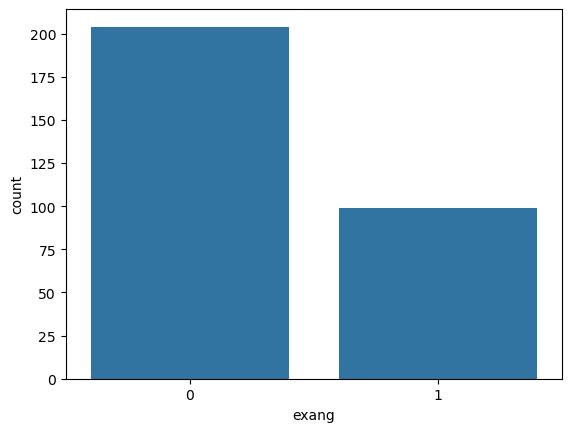

In [55]:
# Using the Countplot we are ploting the graph
sns.countplot(x='exang',data = dataset)

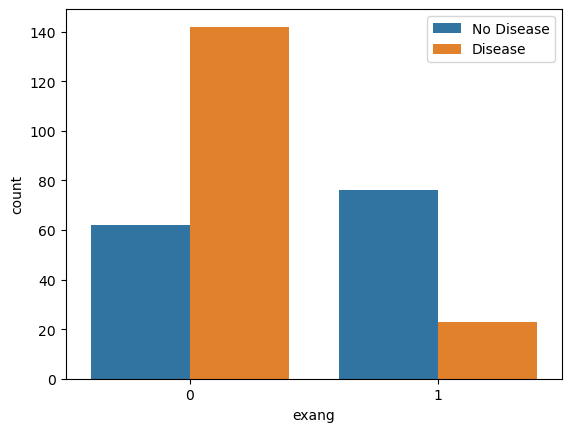

In [56]:
# Using Countplot to plot the graph
sns.countplot(x ="exang",hue = "target",data = dataset) 

# making the label as Disease and No-Disease
plt.legend(labels = ["No Disease","Disease"])
plt.show()

#### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature

In [59]:
# Datatype of "slope" feaature
dataset["slope"].unique()

array([0, 2, 1], dtype=int64)

<Axes: xlabel='slope', ylabel='count'>

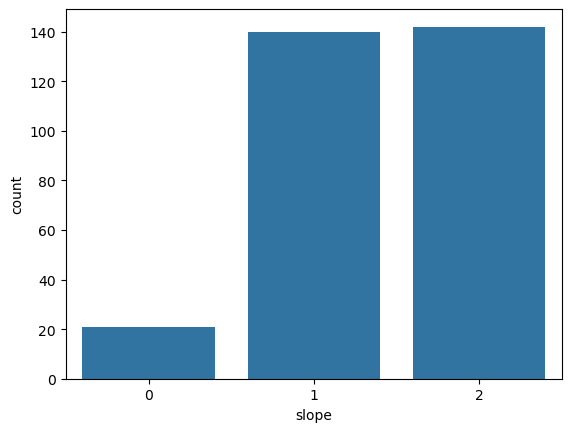

In [60]:
# Using the Countplot we are ploting the graph
sns.countplot(x='slope', data = dataset)

#### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing the 'ca' feature


In [63]:
# Datatype of"ca" featre
dataset["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

<Axes: xlabel='ca', ylabel='count'>

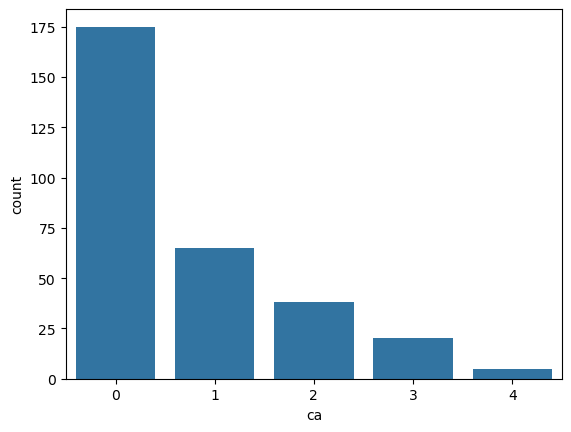

In [64]:
# Using the countplot we are ploting the graph
sns.countplot(x='ca',data=dataset)

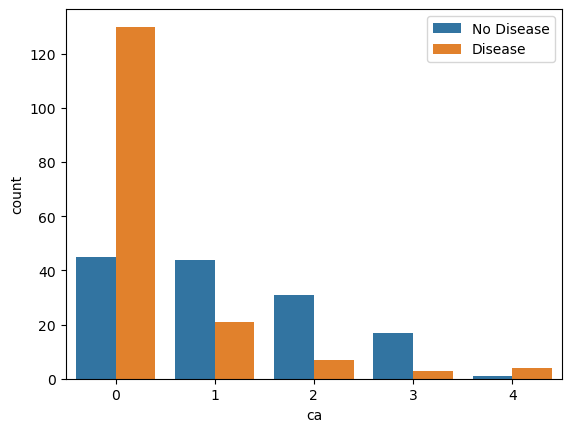

In [65]:
# Using the countplot we are ploting the graph
sns.countplot(x ="ca",hue = "target",data = dataset)

# making the label as Disease and No-Disease
plt.legend(labels = ["No Disease","Disease"])
plt.show()

#### ca=0 has astonishingly large number of heart patients¶

### Analysing the 'thal' feature

In [68]:
# Datatype of "thal" feature
dataset["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

<Axes: xlabel='thal', ylabel='count'>

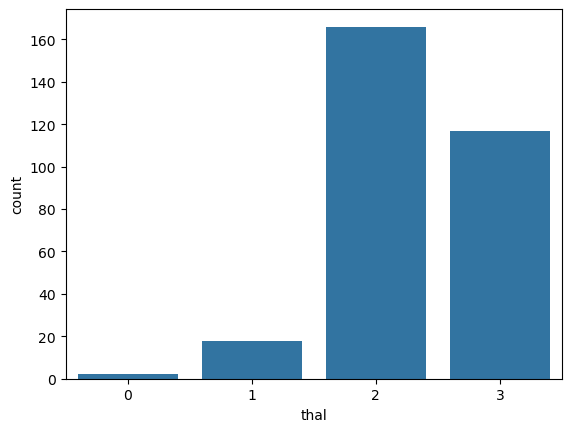

In [69]:
# Using the Countplot we are ploting the graph
sns.countplot(x='thal',data=dataset)

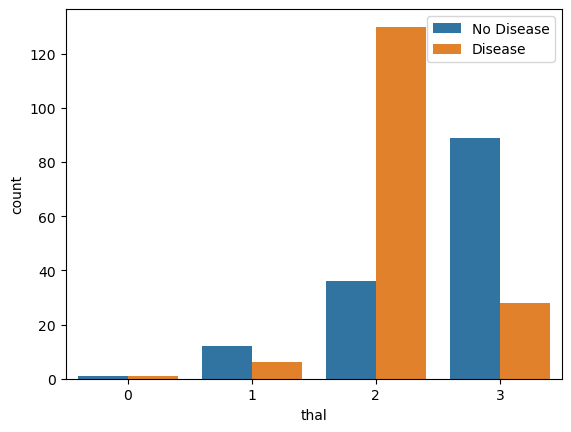

In [70]:
# Using the countplot we are ploting the graph
sns.countplot(x ="thal",hue = "target",data = dataset) 

# making the label as Disease and No-Disease
plt.legend(labels = ["No Disease","Disease"])
plt.show()

### Plot Continuous Variables

In [72]:
#printing the columns of the dataset 
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [73]:
# using two lists
cat_val = []
const_val = []

# using for loop
for columns in dataset.columns:
    # using if condition
    if dataset[columns].nunique() <= 10:
        cat_val.append(columns)
    else:
        const_val.append(columns)

In [74]:
#printing the categorical value list 
print(cat_val)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


In [75]:
# printing the constant value list
print(const_val)

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


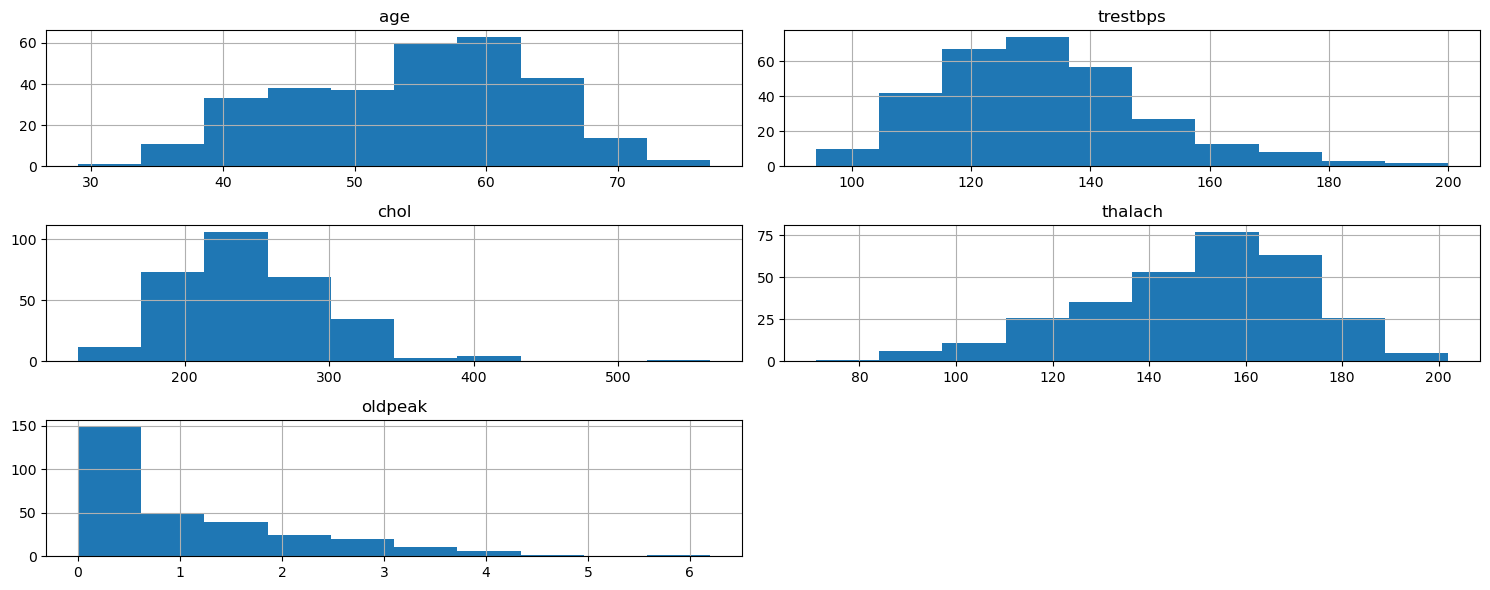

In [76]:
# using Histogram to plot the continuous values
dataset.hist(const_val,figsize=(15,6))

# this function adjust the spacing between sub-graphs
plt.tight_layout()

# displays the graph
plt.show()

# Step4.Feature Engineering

## Feature Selection

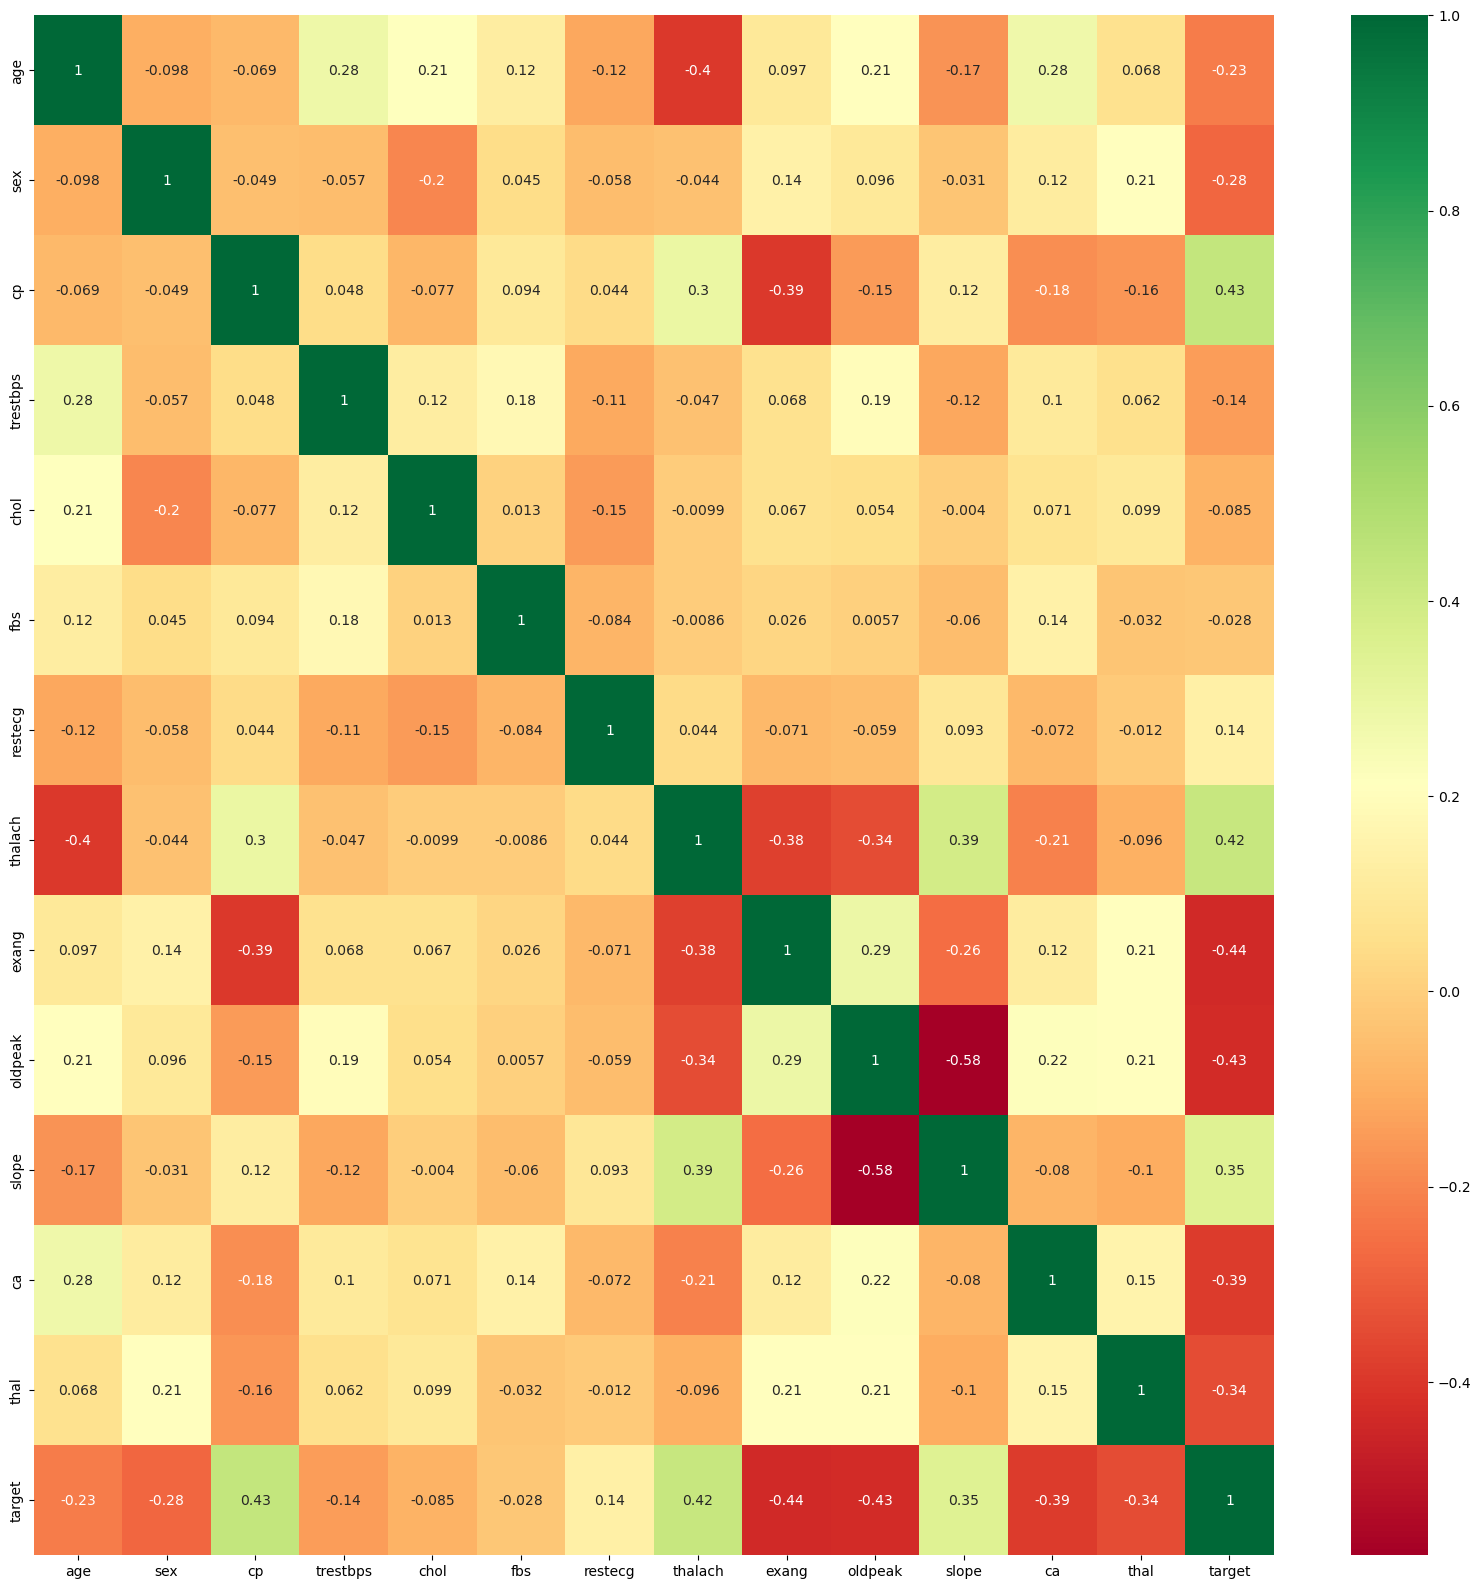

In [79]:
# import the library
import seaborn as sns

#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index

# specifies size and width
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

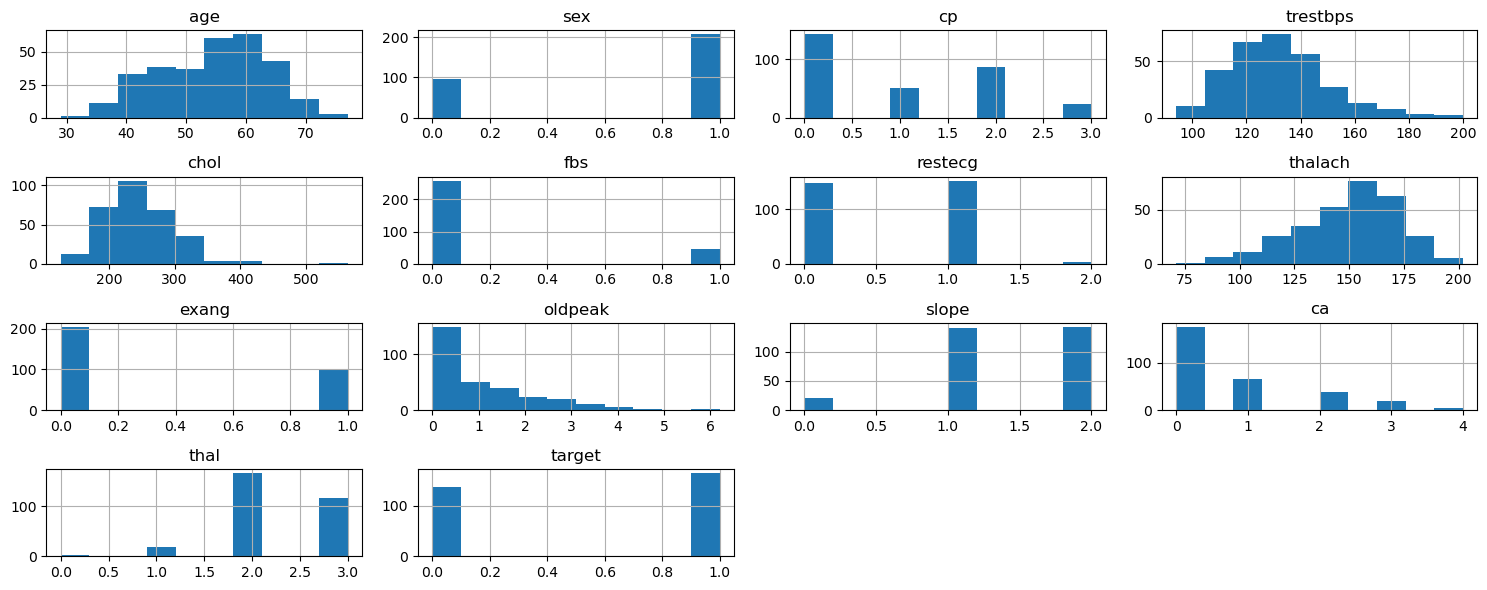

In [80]:
# ploting the data in the form of histogram
df.hist(figsize=(15,6))
plt.tight_layout()
plt.show()

<Axes: xlabel='target', ylabel='count'>

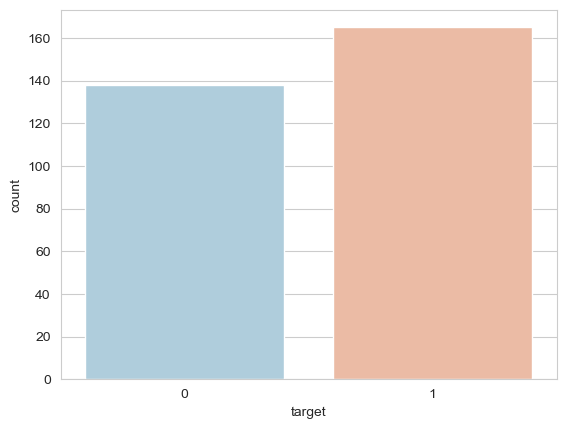

In [81]:
# using countplot of seaborn for plotting the target variable

sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')

##### we can consider it as balanced dataset

## Feature Scaling

In [84]:
# importing the Library
from sklearn.preprocessing import StandardScaler


# using the standardScaler and converting the few selected columns into standard normalization
standardScaler = StandardScaler()

# creating the dummy variables
dataset = pd.get_dummies(df,columns = ['sex','cp','fbs','restecg','exang','slope','ca','thal'])
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])


In [85]:
# We are replacing the True values with '1' and False values with'0'
dataset = dataset.replace({True : 1,False : 0})

In [86]:
# used for printing starting 5 rows from the dataset
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [87]:
# used for printing last 5 rows from the dataset
dataset.tail()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
302,0.290464,-0.092738,-0.198357,1.064975,-0.896862,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [88]:
# used for statistical measures or statistical analysis
dataset.describe()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,4.690051e-17,-7.035077e-16,-1.113887e-16,-6.800574e-16,2.345026e-17,0.544554,0.316832,0.683168,0.471947,0.165017,...,0.468647,0.577558,0.214521,0.125413,0.066007,0.016502,0.006601,0.059406,0.547855,0.386139
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,0.498835,0.466011,0.466011,0.500038,0.371809,...,0.499842,0.494765,0.411169,0.331734,0.248704,0.127605,0.081110,0.236774,0.498528,0.487668
min,-2.797624e+00,-2.148802e+00,-2.324160e+00,-3.439267e+00,-8.968617e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.572802e-01,-6.638668e-01,-6.814943e-01,-7.061105e-01,-8.968617e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.988599e-02,-9.273778e-02,-1.210553e-01,1.466343e-01,-2.067053e-01,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,7.316189e-01,4.783913e-01,5.456738e-01,7.151309e-01,4.834512e-01,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,2.496240e+00,3.905165e+00,6.140401e+00,2.289429e+00,4.451851e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


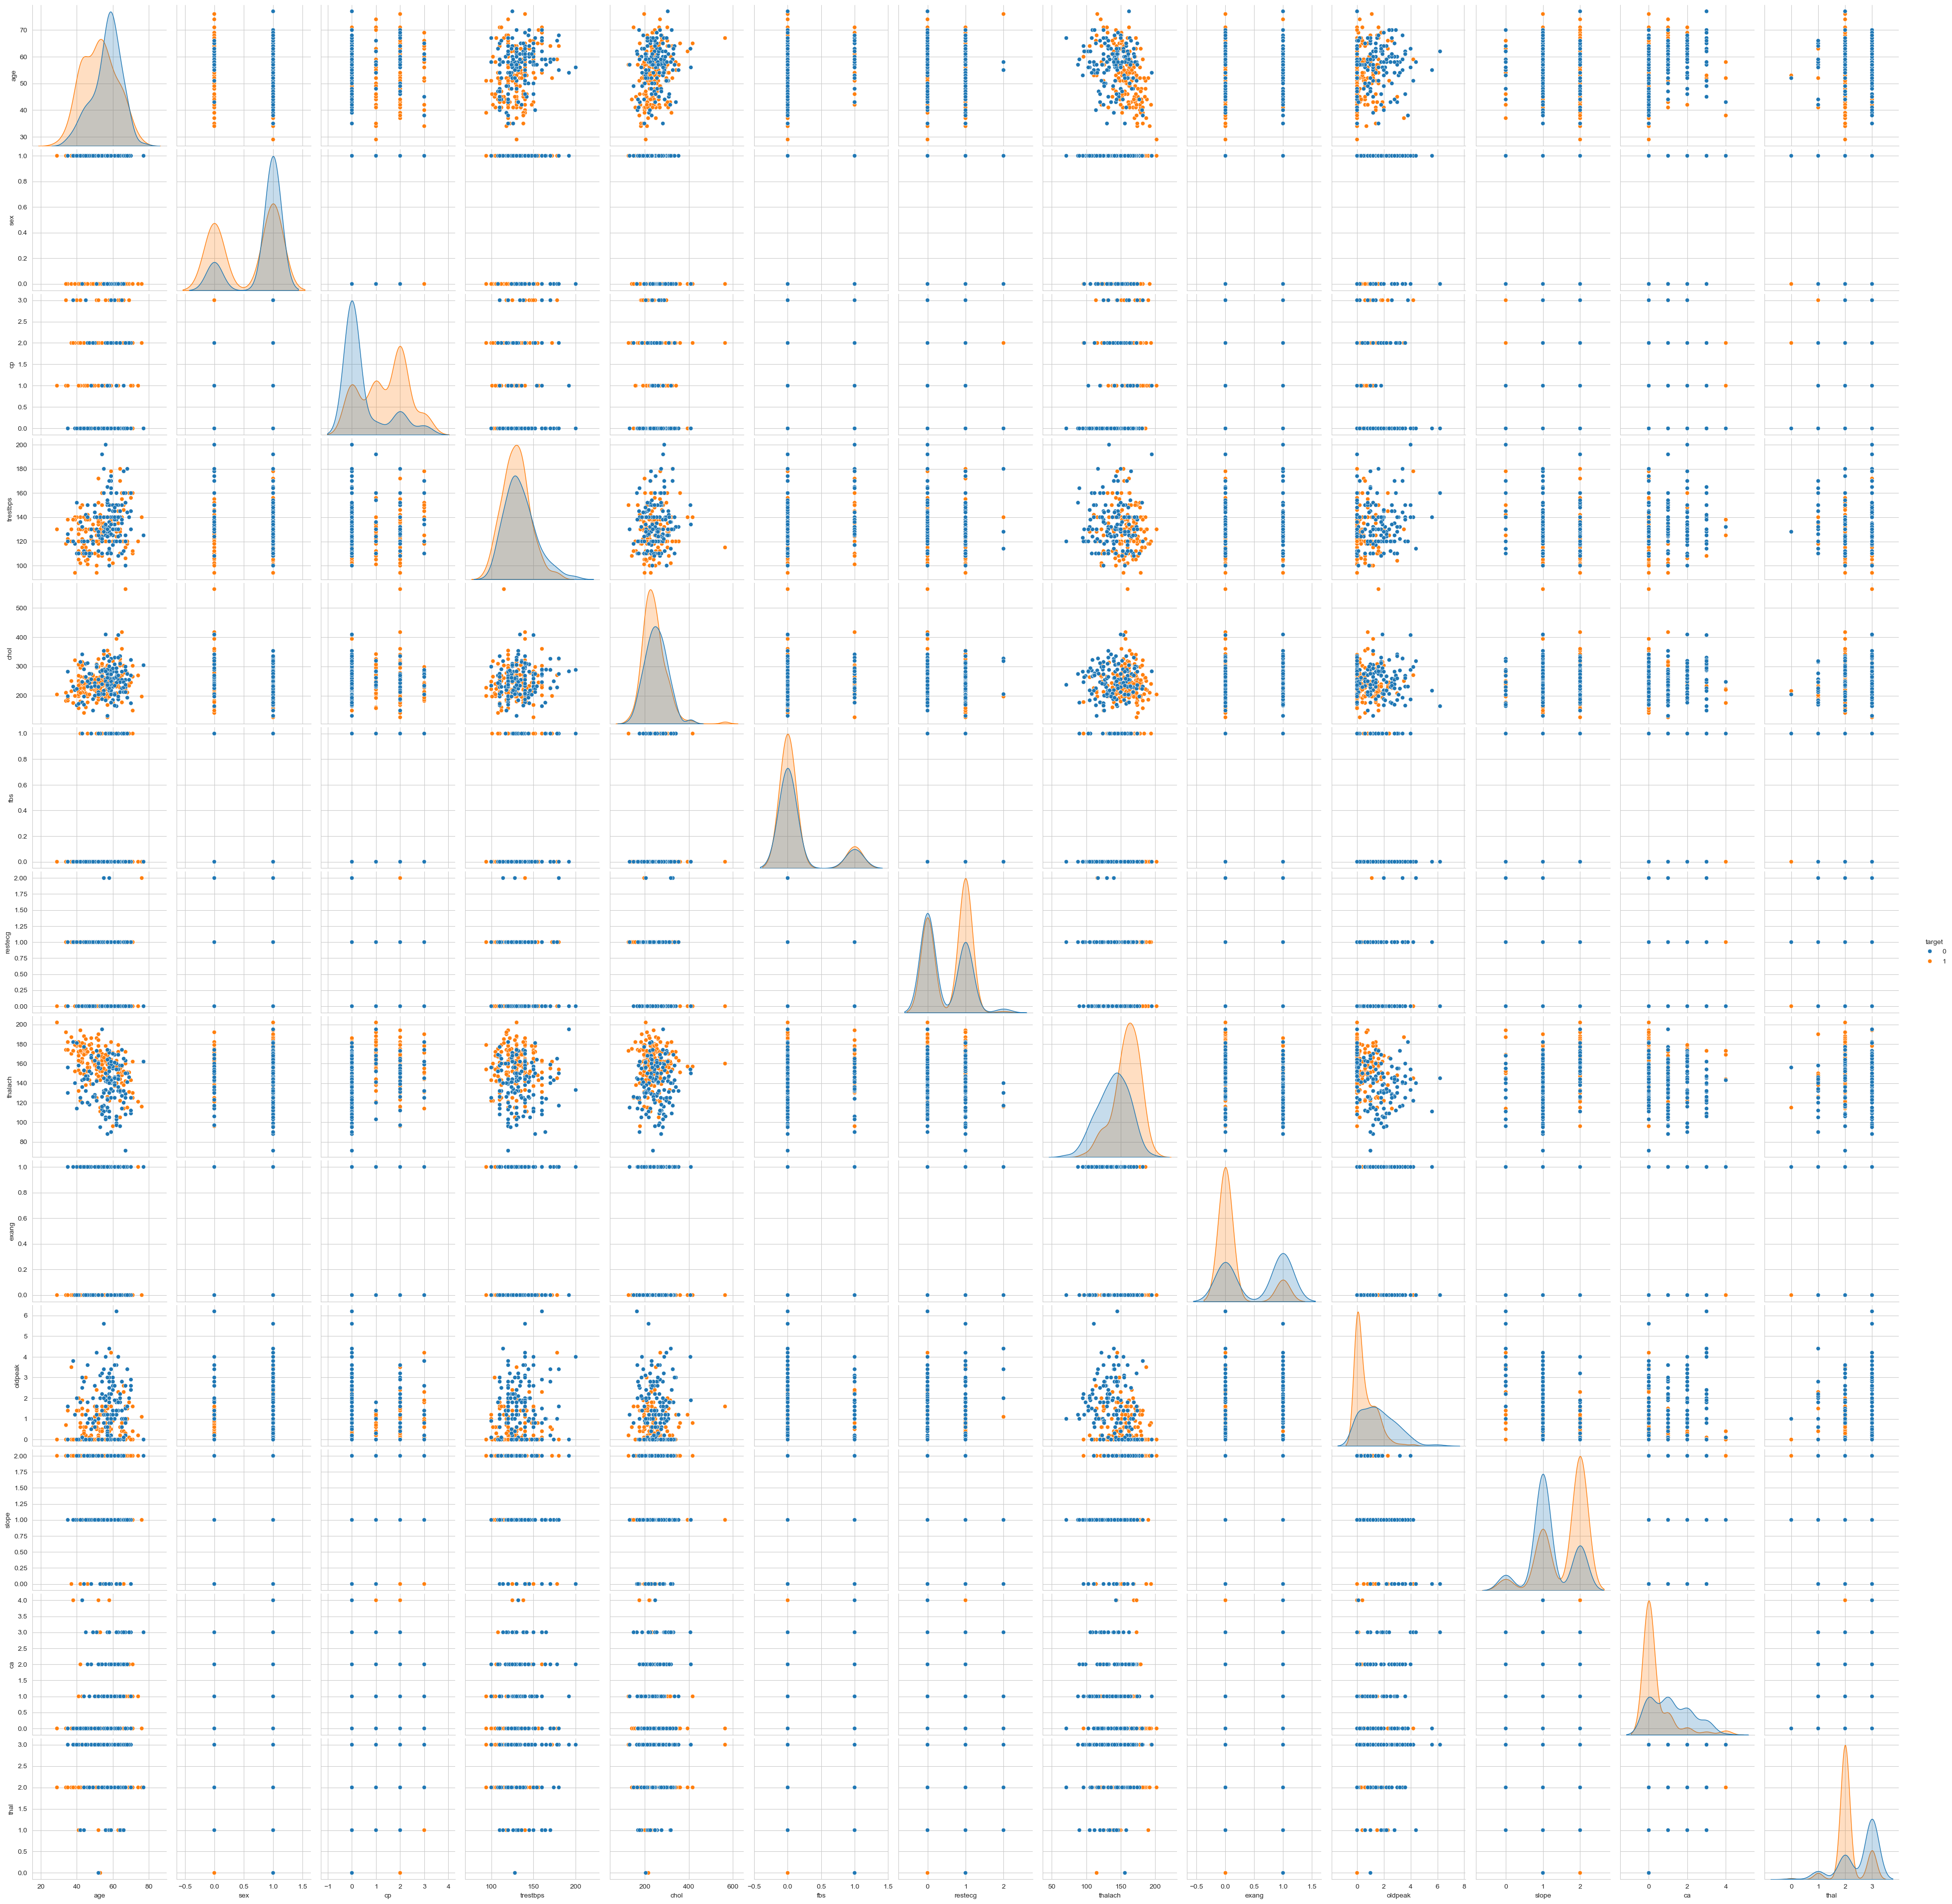

In [89]:
# pairplot in seaborn is used for visiualizing multiple variables in the dataset
sns.pairplot(df,hue = 'target',height = 3,aspect = 1);

## Step:5.Dividing the data into X variable = input and Y variable = output

### Spliting the Features and Target

In [92]:
# dividing the dependent and independent variables
x = dataset.drop(columns = 'target', axis = 1)
y = dataset['target']

In [93]:
#printing the independent variable i.e; 'X' variable 
print(x)

          age  trestbps      chol   thalach   oldpeak  sex_0  sex_1  cp_0  \
0    0.952197  0.763956 -0.256334  0.015443  1.087338      0      1     0   
1   -1.915313 -0.092738  0.072199  1.633471  2.122573      0      1     0   
2   -1.474158 -0.092738 -0.816773  0.977514  0.310912      1      0     0   
3    0.180175 -0.663867 -0.198357  1.239897 -0.206705      0      1     0   
4    0.290464 -0.663867  2.082050  0.583939 -0.379244      1      0     1   
..        ...       ...       ...       ...       ...    ...    ...   ...   
298  0.290464  0.478391 -0.101730 -1.165281 -0.724323      1      0     1   
299 -1.033002 -1.234996  0.342756 -0.771706  0.138373      0      1     0   
300  1.503641  0.706843 -1.029353 -0.378132  2.036303      0      1     1   
301  0.290464 -0.092738 -2.227533 -1.515125  0.138373      0      1     1   
302  0.290464 -0.092738 -0.198357  1.064975 -0.896862      1      0     0   

     cp_1  cp_2  ...  slope_2  ca_0  ca_1  ca_2  ca_3  ca_4  thal_0  thal_1

In [94]:
#printing the 'Y' variable 
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


## Step:6.Splitting the data into train and test parts

### Train Test split¶


In [97]:
# importing train_test_split library
from sklearn.model_selection import train_test_split

In [98]:
#splitting the data into train and test parts 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,stratify = y,random_state=2)

In [99]:
# checking the shape of x variable,and x testing variable and x train variable
print(x.shape,x_train.shape,x_test.shape)

(303, 30) (242, 30) (61, 30)


In [100]:
#  checking the shape of y variable,and y testing variable and y train variable
print(y.shape,y_train.shape,y_test.shape)

(303,) (242,) (61,)


## Step:7. Train Model

### 1. Using Logistic Regression

In [103]:
# importing the library
from sklearn.linear_model import LogisticRegression

# Loading model in variable
model = LogisticRegression(penalty= 'l2',C = 0.01)

In [104]:
# training the LogisticRegression model with x_train anf y_train
model.fit(x_train,y_train)

LogisticRegression(C=0.01)

#### Predicting the test data for Logistic Regression

In [106]:
# predicting the testing data
prediction_model = model.predict(x_test)

# Evaluate the performance of the Trained data on the Testing data
model.score(x_test,y_test)

0.8360655737704918

#### Accuracy score on training data

In [108]:
#importing the library 
from sklearn.metrics import accuracy_score

In [109]:
# accuracy on training data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)

In [110]:
# printing the accuracy of Training data
print('Accuracy on Training data :',training_data_accuracy)

Accuracy on Training data : 0.8347107438016529


#### Accuracy score on testing data

In [112]:
# accuracy on testing data
x_test_prediction = model.predict(x_test)
testing_data_accuracy = accuracy_score(x_test_prediction,y_test)

In [113]:
# printing the accuracy of Testing data
print('Accuracy on Testing data :',testing_data_accuracy)

Accuracy on Testing data : 0.8360655737704918


#### Building A Predictive System

In [119]:
# using tuple
input_data = (41,0,1,130,204,0,0,172,0,1.4,2,0,2,55,5,2,5,4,7,1,5,2,5,1,4,0,6,3,8,9)

# change the input data to a numpy array
input_data_as_numpy_array  = np.asarray(input_data)

# reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

# using if-else condition
if (prediction[0] == 0):
    print("The person does not have Heart Disease")
else:
    print("The person has Heart Disease")

[0]
The person does not have Heart Disease


In [121]:
#predicting the y values 
y_predict = model.predict(x_test)
y_predict

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1], dtype=int64)

#### Prescision and Recall

In [124]:
# importing precisio_score and recall_score library
from sklearn.metrics import precision_score,recall_score

In [126]:
# Printing Precision
print("Precision  : ",precision_score(y_test,y_predict))

# Printing Recall
print("Recall  : ",recall_score(y_test,y_predict))

Precision  :  0.8285714285714286
Recall  :  0.8787878787878788


#### F1_Score

In [129]:
# importing the library
from sklearn.metrics import f1_score

In [131]:
# printing the f1_score
f1 = f1_score(y_test, y_predict)
print(f"F1 Score: {f1}")

F1 Score: 0.8529411764705882


#### Classification Report

In [134]:
# importing the classification report
from sklearn.metrics import classification_report

In [136]:
#Printing the classification report 
print("Classification Report:")
print(classification_report(y_test,y_predict))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.83      0.88      0.85        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



### Confusion Matrix

In [139]:
# importing the confusion matrix libarary
from sklearn.metrics import confusion_matrix

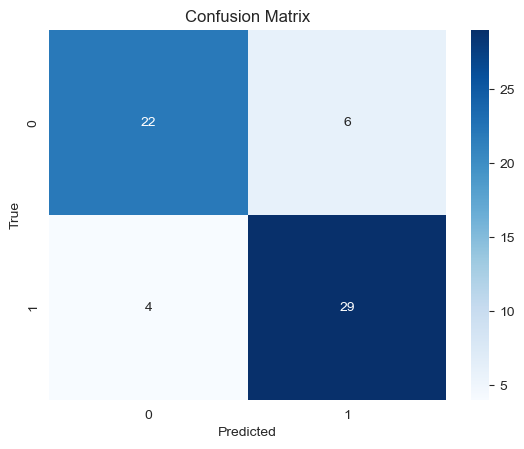

In [141]:
# Confusion Matrix
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot = True,fmt = 'd',cmap = 'Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## 2. Using Random Forest Classifier

In [144]:
# importing Library
from sklearn.ensemble import RandomForestClassifier

# loading model in variable
RF = RandomForestClassifier(n_estimators = 100,random_state = 42,min_samples_leaf = 4,min_samples_split = 4,max_leaf_nodes = 8,max_features=4)

In [145]:
# Training the model x_train and y_train
RF.fit(x_train,y_train)

RandomForestClassifier(max_features=4, max_leaf_nodes=8, min_samples_leaf=4,
                       min_samples_split=4, random_state=42)

#### Predicting the Test data for Random Forest Classifier

In [147]:
# Predicting the testing data
pred_rf = RF.predict(x_test)

In [148]:
# Evaluates the performance of the trained RF on the testing dta
RF.score(x_test,y_test)

0.8032786885245902

#### Training Accuracy

In [151]:
# importing the library
from sklearn.metrics import accuracy_score

In [155]:
# calculate Accuracy of Training Data
train_accuracy = accuracy_score(y_train,RF.predict(x_train))

# Displays the Accuracy of Training data
print(train_accuracy)

0.8842975206611571


#### Testing Accuracy

In [159]:
# Predicts Accuracy Of Testing data
y_pred = RF.predict(x_test)

# calculates Accuracy of Testing data
test_accuracy = accuracy_score(y_test,y_pred)

# Displays the Accuracy of Testing data
print(test_accuracy)

0.8032786885245902


#### Using Hyperparameter Tuning for good Accuracy

In [162]:
# importing the library
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 0.5]
}

grid_search = GridSearchCV(RandomForestClassifier(n_estimators=100, random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(x_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best F1 Score: {grid_search.best_score_}")

Best Parameters: {'max_depth': 5, 'max_features': 0.5, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best F1 Score: 0.8738191632928475


#### Precision and Recall

In [164]:
# importing precision_score and recall_score library
from sklearn.metrics import precision_score,recall_score

In [165]:
# Printing Precision
print("Precision  : ",precision_score(y_test,y_pred))

# Printing Recall
print("Recall  : ",recall_score(y_test,y_pred))

Precision  :  0.8387096774193549
Recall  :  0.7878787878787878


#### Classification Report

In [167]:
# importing the classification report
from sklearn.metrics import classification_report

In [168]:
# printing the classification report
print("Classification Report:")
print(classification_report(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.79        28
           1       0.84      0.79      0.81        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



#### Confusion Matrix

In [170]:
# importing the confusion matrix
from sklearn.metrics import confusion_matrix

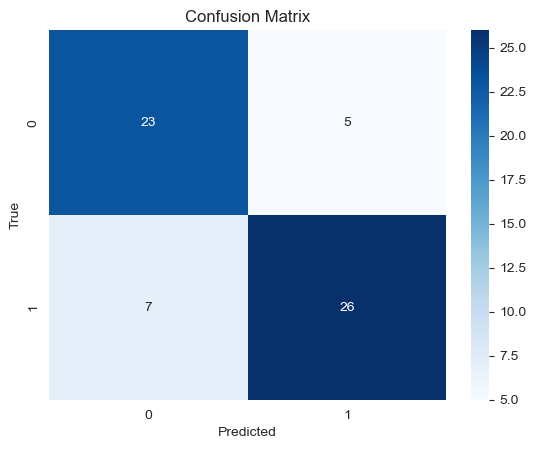

In [171]:
# Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot = True,fmt = 'd',cmap = 'Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### 3.Using K_Nearest Neighbour Classifier

In [173]:
# importing Library
from sklearn.neighbors import KNeighborsClassifier

In [174]:
# Initialize the KNN classifier
k = 5  # You can experiment with different values for k
model = KNeighborsClassifier(n_neighbors=k)

In [175]:
# Train the model
model.fit(x_train, y_train)

KNeighborsClassifier()

#### Predicting the Test data for kNN Classifier¶

In [177]:
# Make predictions
y_pred1 = model.predict(x_test)

In [178]:
model.score(x_test,y_test)

0.8032786885245902

#### Training Accuracy

In [180]:
#importing the library 
from sklearn.metrics import accuracy_score

In [181]:
# calculate Accuracy of Training Data
train_accuracy = accuracy_score(y_train,model.predict(x_train))

# Displays the Accuracy of Training data
print(train_accuracy)

0.9008264462809917


#### Testing Accuracy

In [183]:
# Predicts Accuracy Of Testing data
y_pred1 = model.predict(x_test)

# calculates Accuracy of Testing data
test_accuracy = accuracy_score(y_test,y_pred1)

# Displays the Accuracy of Testing data
print(test_accuracy)

0.8032786885245902


#### Using Hyperparameter Tuning for good accuracy 

In [185]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 21)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='f1')
grid_search.fit(x_train, y_train)

print(f"Best k: {grid_search.best_params_['n_neighbors']}")
print(f"Best F1 Score: {grid_search.best_score_}")

Best k: 5
Best F1 Score: 0.8769014038363883


#### Precision And Recall

In [187]:
# importing precision_score and recall_score library
from sklearn.metrics import precision_score,recall_score

In [188]:
# Printing Precision
print("Precision  : ",precision_score(y_test,y_pred1))

# Printing Recall
print("Recall  : ",recall_score(y_test,y_pred1))

Precision  :  0.8620689655172413
Recall  :  0.7575757575757576


#### Classification Report

In [190]:
# importing the classification report
from sklearn.metrics import classification_report

In [191]:
# printing the classification report
print("Classification Report:")
print(classification_report(y_test,y_pred1))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        28
           1       0.86      0.76      0.81        33

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



#### Confusion Matrix

In [193]:
# importing the confusion matrix
from sklearn.metrics import confusion_matrix

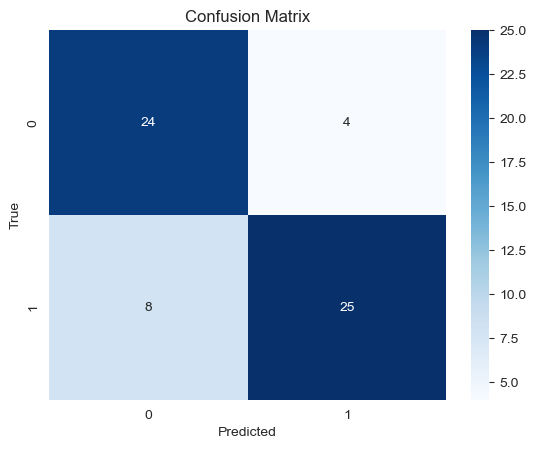

In [194]:
# Confusion Matrix
cm=confusion_matrix(y_test,y_pred1)
sns.heatmap(cm,annot = True,fmt = 'd',cmap = 'Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### Final Data

In [196]:
# importing the library
from sklearn.metrics import accuracy_score

In [197]:
#using dictionary 
final_data = pd.DataFrame({'Models':['LR','KNN','RF'],
                           'ACC':[accuracy_score(y_test,y_predict),
                                  accuracy_score(y_test,y_pred1),
                                  accuracy_score(y_test,y_pred)]})
                                                 

In [198]:
#Printing the final data 
print(final_data)

  Models       ACC
0     LR  0.836066
1    KNN  0.803279
2     RF  0.803279


In [199]:
#importing the seaborn library 
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

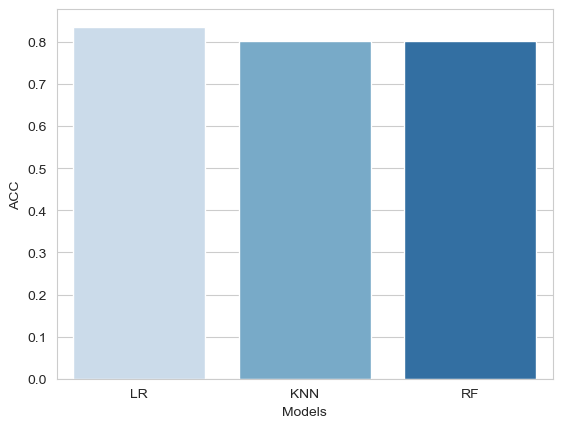

In [200]:
#using the barplot 
sns.barplot(x= final_data['Models'],y =final_data['ACC'],data = final_data,palette='Blues')

### Hence,Logistic Regression is the best model